In [1]:
! pip install pandas
! pip install numpy
! pip install seaborn


import seaborn as sns 
import pandas as pd
import numpy as np
df=sns.load_dataset('titanic')

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.0 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 806.3 kB/s eta 0:00:00
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 5.5 MB/s eta 0:00:03
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.3/11.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.4/11.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.4/11.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.5/11.6 MB 973.2 kB/s eta 0:00:12
   -- ------------------

In [2]:
df.sex.unique()
#df.sex.nunique()


array(['male', 'female'], dtype=object)

In [3]:
df.embark_town.nunique()

3

In [4]:
df['adult_male'].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [5]:
df.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [6]:
df.groupby('sex')['fare','survived'].mean()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [7]:
# corelation matrix of numerical columns
df_corelation=df[['age','fare','sibsp','parch']].corr()

<Axes: >

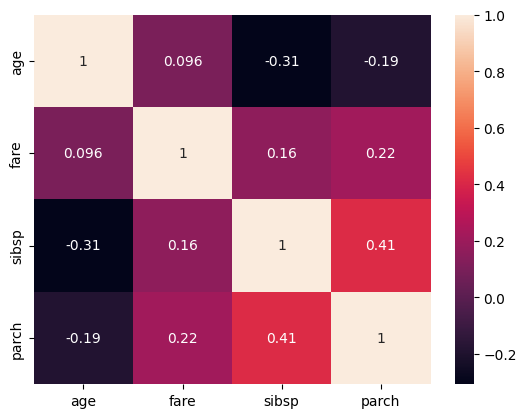

In [8]:
sns.heatmap(df_corelation,annot=True)

In [9]:
df['age'].nunique()

88

In [ ]:
df["embarked"].isnull().sum()

2

In [ ]:
df['embark_town'].mode()[0]

'Southampton'

In [ ]:
df['embarked'].mode()[0]

'S'

In [ ]:
df["embark_town"].fillna(df['embark_town'].mode(),inplace=True)

In [ ]:
df['embarked'].fillna(df['embarked'].mode(),inplace=True)
    


In [ ]:
df.embarked.isnull().sum()

2

In [ ]:
df['age'].isnull().sum()/len(df)*100

TypeError: 'NoneType' object is not subscriptable

In [ ]:
#how to fill null values
df=df.age.fillna(df.age.mean(),inplace=True)

C:\Users\Aaima Amir\AppData\Local\Temp\ipykernel_14284\4243637193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df=df.age.fillna(df.age.mean(),inplace=True)


In [52]:
df['age']=df['age'].fillna(df['age'].mean())

In [41]:
df.age.min()

0.42

In [42]:
df.age.max()

80.0

<Axes: xlabel='age', ylabel='Count'>

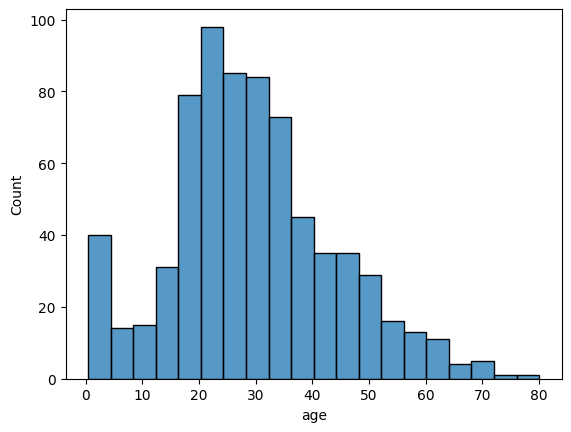

In [11]:
sns.histplot(df['age'])

In [12]:
bins=[0,1,5,12,20,30,50,60,80]
labels=['infants','teenagers','kids','children','young_adults','adults','middle_aged','old']


pd.cut(df['age'],bins=bins,labels=labels)


0      young_adults
1            adults
2      young_adults
3            adults
4            adults
           ...     
886    young_adults
887        children
888             NaN
889    young_adults
890          adults
Name: age, Length: 891, dtype: category
Categories (8, object): ['infants' < 'teenagers' < 'kids' < 'children' < 'young_adults' < 'adults' < 'middle_aged' < 'old']

In [13]:
bins=[0,1,5,12,20,30,50,60,80]
labels=['infants','teenagers','kids','children','young_adults','adults','middle_aged','old']


df['binned_ages']=pd.cut(df['age'],bins=bins,labels=labels)

In [14]:
df['binned_ages'].value_counts()

binned_ages
adults          241
young_adults    230
children        110
middle_aged      42
teenagers        30
kids             25
old              22
infants          14
Name: count, dtype: int64

*** Feature Engineering**

In [15]:
df=df.drop(columns='deck',axis=1)


In [81]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_ages
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,young_adults
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adults
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young_adults
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adults
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,young_adults
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,children
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,young_adults
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,young_adults


In [16]:
#rename a column
df.rename(columns={"binned_ages":"age_group"},inplace=True)

In [84]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,young_adults
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adults
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young_adults
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adults
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,young_adults
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,children
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,young_adults
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,young_adults


In [17]:
df['age_group'].value_counts()

age_group
adults          241
young_adults    230
children        110
middle_aged      42
teenagers        30
kids             25
old              22
infants          14
Name: count, dtype: int64

In [18]:
df.groupby('survived')['age_group'].value_counts()

survived  age_group   
0         young_adults    146
          adults          139
          children         68
          middle_aged      25
          old              17
          kids             16
          teenagers        11
          infants           2
1         adults          102
          young_adults     84
          children         42
          teenagers        19
          middle_aged      17
          infants          12
          kids              9
          old               5
Name: count, dtype: int64

In [19]:
df.groupby('survived')['sex'].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [91]:
df.groupby('sex')

In [49]:
#data filteration
df_1=df[['sex','age_group','fare','pclass','survived']]

In [25]:
df.head()

,sex,age_group,fare,pclass,survived
0,male,young_adults,7.2500,3,0
1,female,adults,71.2833,1,1
2,female,young_adults,7.9250,3,1
3,female,adults,53.1000,1,1
4,male,adults,8.0500,3,0


In [33]:
df[['age_group','sex']].value_counts()

age_group     sex   
adults        male      155
young_adults  male      149
adults        female     86
young_adults  female     81
children      male       65
              female     45
middle_aged   male       28
old           male       19
teenagers     female     17
kids          male       14
middle_aged   female     14
teenagers     male       13
kids          female     11
infants       male       10
              female      4
old           female      3
Name: count, dtype: int64

In [37]:
df.columns

Index(['sex', 'age_group', 'fare', 'pclass', 'survived'], dtype='object')

In [48]:
df_1=df['pclass'].value_counts()
df_1

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [50]:
first_class=df_1[df_1['pclass']=='1']

In [59]:
df_200=df_1[df_1['fare']>71].value_counts()
df_200

sex     age_group     fare      pclass  survived
male    young_adults  73.5000   2       0           3
female  middle_aged   78.2667   1       1           2
        young_adults  263.0000  1       1           2
male    adults        512.3292  1       1           2
female  adults        90.0000   1       1           2
                                                   ..
                      83.1583   1       1           1
                      80.0000   1       1           1
                      79.6500   1       1           1
                      76.7292   1       1           1
male    old           263.0000  1       0           1
Name: count, Length: 85, dtype: int64

In [60]:
df_200.info()

<class 'pandas.core.series.Series'>
MultiIndex: 85 entries, ('male', 'young_adults', 73.5, 2, 0) to ('male', 'old', 263.0, 1, 0)
Series name: count
Non-Null Count  Dtype
--------------  -----
85 non-null     int64
dtypes: int64(1)
memory usage: 2.1+ KB


In [65]:
df_200['pclass'].value_counts()

KeyError: 'pclass'

## how to apply 2 filters


In [66]:
df_1[(df_1['fare']>70) & (df_1['pclass']==1)].sort_values(by='fare',ascending=False)

,sex,age_group,fare,pclass,survived
258,female,adults,512.3292,1,1
737,male,adults,512.3292,1,1
679,male,adults,512.3292,1,1
438,male,old,263.0000,1,0
341,female,young_adults,263.0000,1,1
...,...,...,...,...,...
218,female,adults,76.2917,1,1
366,female,middle_aged,75.2500,1,1
1,female,adults,71.2833,1,1
745,male,old,71.0000,1,0


In [70]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000


In [73]:
df_1['fare'].sum() # the sum of fare in first class was

28693.9493

In [79]:
print('the sum of fare in first class was:',df_1['fare'].sum())

the sum of fare in first class was: 28693.9493


In [13]:
df=pd.read_csv('data/data_Lec13.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
import ydata_profiling as ydp
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
profile=ydp.ProfileReport(df)
profile.to_file(output_file='ydata_titanic.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:  77%|███████▋  | 17/22 [00:01<00:00, 20.45it/s, Calculate auto correlation]   c:\Users\Aaima Amir\miniconda3\envs\eda_env\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'no'')
  warnings.warn(
Summarize dataset:  88%|████████▊ | 36/41 [00:31<00:10,  2.07s/it, Missing diagram heatmap]   c:\Users\Aaima Amir\miniconda3\envs\eda_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\Aaima Amir\miniconda3\

In [4]:
! pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 139.4/139.4 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ----------------- ---------------------- 92.2/215.0 kB 2.6 MB/s eta 0:00:01
   ----------------- ---------------------- 92.2/215.0 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 215.0/215.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.3 MB 2.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/2.3 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.3 MB 1.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.3/2.3 MB 983.9 kB/s eta 0:00:03
   ------ --------------------------------- 0.4/2.3 MB 1.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.3 MB 1.0 MB/s eta 0:00:02
   ------- --